# Tools and Methods of Data Analysis
## Session 3 - Part 1

Niels Hoppe <<niels.hoppe.extern@srh.de>>

### Statistical Parameters

* Measures of Central Tendency
* Measures of Dispersion

### Measures of Central Tendency

* (Arithmetic) Mean
* Geometric mean
* Harmonic mean
* Median
* Mode

#### (Arithmetic) Mean

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [249]:
df = pd.DataFrame([(1,   0.5),
                   (0.5, 1),
                   (2,   1)], columns=('value', 'weight'))

mean = df.loc[:, 'value'].mean()
mean

1.1666666666666667

In [250]:

wmean = np.average(a=df.loc[:, 'value'], weights=df.loc[:, 'weight'])
wmean

1.2

#### Geometric Mean

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gmean.html

Example from https://en.wikipedia.org/wiki/Geometric_mean#Proportional_growth

In [251]:
df = pd.DataFrame([(100, np.NaN),
                   (180, 180 / 100),
                   (210, 210 / 180),
                   (300, 300 / 210)], columns=['yield', 'growth'])

df

,yield,growth
0,100,NaN
1,180,1.800000
2,210,1.166667
3,300,1.428571


#### Geometric Mean (cont.)

In [252]:
mean = df.loc[:, 'growth'].mean()
mean

1.4650793650793652

In [253]:
from scipy import stats

gmean = stats.gmean(df.loc[:, 'growth'].dropna(), axis=0)
gmean

1.4422495703074085

In [254]:
print('Actual yield:   ', 300)
print('Arithmetic mean:', 100 * mean ** 3)
print('Geometric mean: ', 100 * gmean ** 3)

Actual yield:    300
Arithmetic mean: 314.4730658636177
Geometric mean:  300.0000000000001


#### Harmonic Mean

Example from https://en.wikipedia.org/wiki/Harmonic_mean#Average_speed

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hmean.html

In [255]:
df = pd.DataFrame([60, 20], columns=['speed'])

mean = df.loc[:, 'speed'].mean()
mean

40.0

In [256]:
hmean = stats.hmean(df.loc[:, 'speed'])
hmean

30.0

In [257]:
print('Actual time:    ', 100 / 60 + 100 / 20)
print('Arithmetic mean:', 200 / mean)
print('Harmonic mean:  ', 200 / hmean)

Actual time:     6.666666666666667
Arithmetic mean: 5.0
Harmonic mean:   6.666666666666667


#### Harmonic Mean (cont.)

In [258]:
df = pd.DataFrame([(200, 100),
                   (300, 50)], columns=['distance', 'speed'])

mean = df.loc[:, 'speed'].mean()
mean

75.0

In [259]:
#hmean = stats.hmean(df.loc[:, 'speed'], weights=df.loc[:, 'distance'])

#### Median

The **median** of a set of values is the **value separating the lower half from the higher half** of all values.

* https://en.wikipedia.org/wiki/Median
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html

Median (cont.)

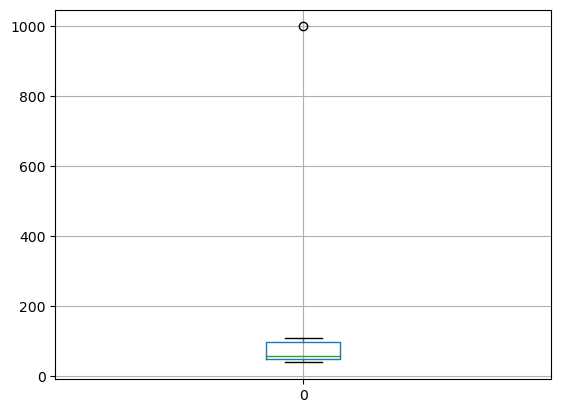

In [260]:
df = pd.DataFrame([40, 50, 60, 45, 55, 50, 90, 100, 110, 1000])

df.boxplot()

#### Median (cont.)

In [261]:
df.mean()

0    160.0
dtype: float64

In [262]:
df.median()

0    57.5
dtype: float64

#### Mode

The **mode** of a set of values is the **value that appears most often**. It can be multiple values.

* https://en.wikipedia.org/wiki/Mode_(statistics)
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html

In [263]:
df.mode()

,0
0,50


### Measures of Dispersion

* Range
* Quantiles, Quartiles, Interquartile Range
* Variance
* Standard Deviation
* Coefficient of Variation

#### Range

The **range** is of a set of data is the difference between the smallest and largest value.

In [264]:
range = df.max() - df.min()
range

0    960
dtype: int64

#### Quantiles, Quartiles, Interquartile Range

Quantile:

* Value greater than or equal to a specified percentage of all values. (inclusive definition)
* Value greater than a specified percentage of all values. (exclusive definition)

Quartiles and deciles and percentiles are special quantiles:

* Quartile: Any of three values dividing the data into four equal parts.
* Decile: Any of nine values dividing the data into ten equal parts.
* Percentile: Any of 99 values dividing the data into 100 equal parts.

The following equalities hold:

* 25th percentile = 1st quartile (Q1)
* 50th percentile = 2nd quartile (Q2) = 5th decile (D5) = median
* 75th percentile = 3rd quartile (Q3)


#### Quantiles, Quartiles, Interquartile Range (cont.)

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [265]:
p25, p75 = np.percentile(df[0], [25, 75])

quartiles = df[0].quantile([0.25, 0.5, 0.75])

quartiles

0.25    50.0
0.50    57.5
0.75    97.5
Name: 0, dtype: float64

#### Quantiles, Quartiles, Interquartile Range (cont.)

In [266]:
q1, q3 = df[0].quantile([0.25, 0.75])

iqr = q3 - q1

iqr

47.5

#### Trimmed Mean



In [267]:
stats.trim_mean(df[0], 0.1)

70.0

#### Variance

* https://en.wikipedia.org/wiki/Variance
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html

In [268]:
df[0].var()

87716.66666666667

In [269]:
df[0].var(ddof=0)

78945.0

#### Standard Deviation

* https://en.wikipedia.org/wiki/Standard_deviation
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

In [270]:
df[0].std()

296.1699962296429

In [271]:
df[0].std(ddof=0)

280.9715288067458

#### Coefficient of Variation

* https://en.wikipedia.org/wiki/Coefficient_of_variation

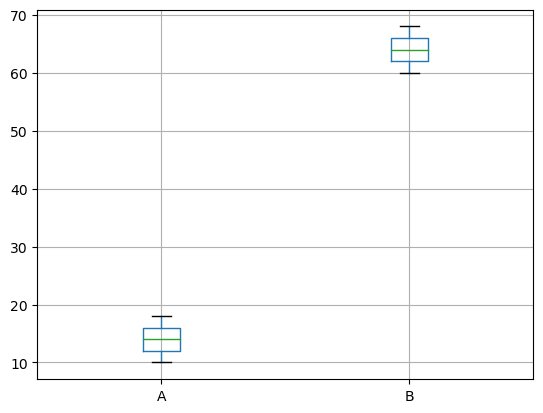

In [272]:
df = pd.DataFrame([(10, 60), (12, 62), (14, 64),
                   (16, 66), (18, 68)], columns=['A', 'B'])

df.boxplot()

#### Coefficient of Variation (cont.)

In [273]:
df.std()

A    3.162278
B    3.162278
dtype: float64

In [274]:
cov = df.std() / df.mean()
cov

A    0.225877
B    0.049411
dtype: float64